## Decision Tree(의사결정 나무)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

(1) 문제 정의
- 버섯 데이터를 이용하여 Dicision Tree로 학습하고 추론(독버섯인지 아닌지

(2) 데이터 수집

In [2]:
mushroom = pd.read_csv('mushroom.csv')

mushroom.head(5)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
#특성데이터와 라벨데이터
X = mushroom.iloc[:,1:]
y = mushroom.iloc[:,0]

In [5]:
# y의 클래스들의 갯수를 출력
y.value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

In [6]:
# cap-shape 클래스의 종류
X['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [7]:
X['cap-shape'].value_counts()

# 값이 작은 데이터를 통합(범주형 데이터 통합)

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

encoding: 범주형 데이터를 수치형 데이터 변환

데이터 표현
- 연속데이터 : 연속된 숫자로 구성된 데이터
- 범주형데이터 : 이산적인 숫자나 문자로 구성된 데이터
    - 숫자로 되어진 범주형 데이터는 신경을 써서 처리
- 특성을 연속데이터로 표현할지 범주형 데이터로 표현하지를 결정하는 것이 중요
- 특성공학(feature engineering) : 학습에 최적화된 특성으로 변경하는 작업

- 기계를 숫자를 이용해서 연산 -> 범주형 데이터를 숫자로 변화해서 처리 좋음 -> 라벨(label)인코딩
- 범주형 수자는 가능하면 0과 1로 구성된 숫자로 변환해서 사용하는 것이 좋음 -> one hot 인코딩

## 라벨 인코딩

In [8]:
temp1 = X.copy()   #temp1을 변경해도 X는 변경되지 않음 (복사본)
temp2 = X   #temp2를 변경하면 X도 변경

In [9]:
temp1['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [10]:
# x> 0, b->1,s->2,f->3,k->4,c->5

temp1['cap-shape'] = temp1['cap-shape'].map({'x':0,'b':1,'s':2,'f':3,'k':4,'c':5})

temp1['cap-shape'].value_counts()

0    3656
3    3152
4     828
1     452
2      32
5       4
Name: cap-shape, dtype: int64

In [11]:
temp1['gill-color'].unique()

array(['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
      dtype=object)

In [12]:
temp1['gill-color'] = temp1['gill-color'].map({'k':0,'n':1,'g':2,'p':3,'w':4,'h':5,'u':6, 'e':7, 'b':8, 'r':9, 'y':10, 'o':11})

temp1['gill-color'].value_counts()

8     1728
3     1492
4     1202
1     1048
2      752
5      732
6      492
0      408
7       96
10      86
11      64
9       24
Name: gill-color, dtype: int64

In [13]:
temp1['odor'].unique()

array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object)

In [14]:
temp1['odor'] = temp1['odor'].map({string : i for i,string in enumerate(temp1['odor'].unique())})

In [15]:
temp1['odor'].value_counts()

3    3528
4    2160
7     576
6     576
2     400
1     400
0     256
5     192
8      36
Name: odor, dtype: int64

one hot encoding: 범주형을 0과 1로 구성된 숫자로 변환

- 기계는 0과 1로된 계산을 하기때문에 미리 0과 1로 만들어주면 계산 편해짐
- 컬럼이 증가 -> 특성이 증가 -> 과소적합 없어짐

- 특성이 10개일 때 10개 특성을 사용해서 학습시키는 것
- 특성을 100개로 늘려서 중요한 10개의 특성만 뽑아서 학습시키는 것(0)

In [16]:
temp = temp1['gill-size']
temp.unique()

array(['n', 'b'], dtype=object)

In [17]:
temp_one = pd.get_dummies(temp)
temp_one.head()

,b,n
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [18]:
temp = temp1['cap-color']
temp.unique()

array(['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], dtype=object)

In [19]:
temp_one = pd.get_dummies(temp)

temp_one.head()

,b,c,e,g,n,p,r,u,w,y
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0


In [20]:
X1 = X.copy()
X_en = pd.get_dummies(X1)

X_en.head()

X_en.shape

(8124, 117)

In [21]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_en, y, test_size=0.3)

In [55]:
from sklearn.tree import DecisionTreeClassifier

#모델 선택
tree_model = DecisionTreeClassifier()
#모델 학습
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
tree_model.score(X_train, y_train)

1.0

In [57]:
tree_model.score(X_test, y_test)

0.9991796554552912

In [58]:
tree_model.classes_

array(['e', 'p'], dtype=object)

In [59]:
from sklearn.tree import export_graphviz
# out_file 저장할 파일 이름, class_names = 그림에서 표기할 클래스 이름
# feature_names = 그림에서 표기할 특성 이름
# impurity = GINI 불순도를 표기(True)하거나 하지않음(False)
# filled = True

export_graphviz(tree_model, out_file = 'tree.dot',
               class_names=['식용','독'],
               feature_names=X_train.columns,
               impurity=True,
               filled = True)

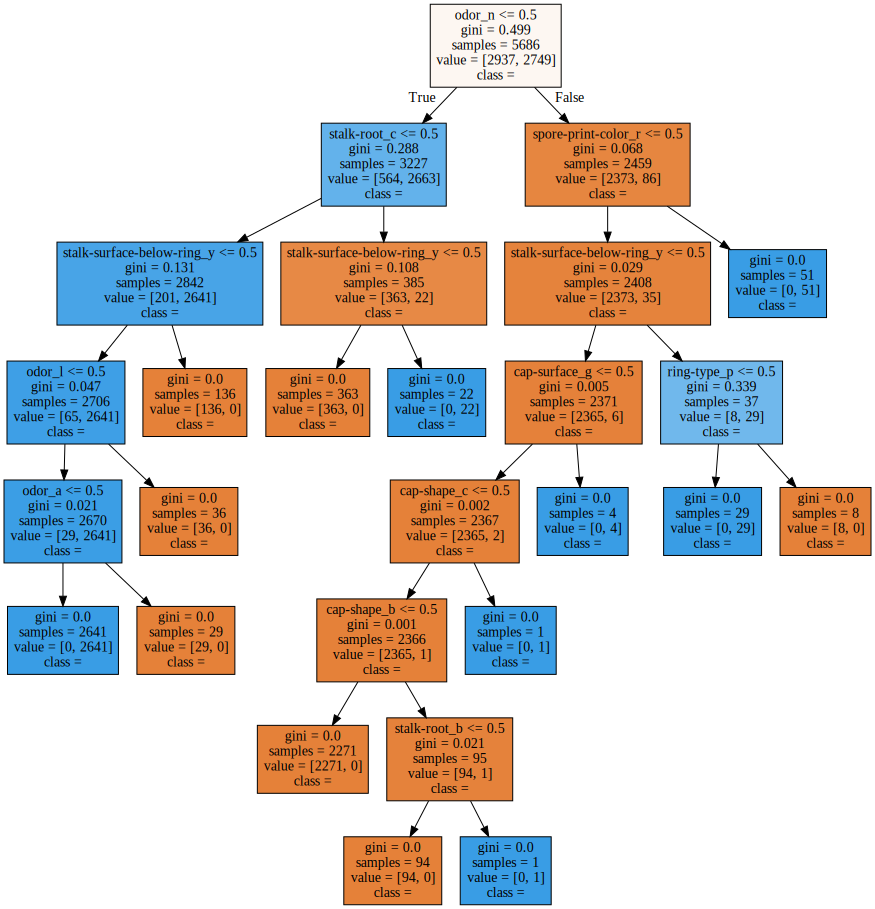

In [60]:
import graphviz

with open('tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [61]:
tree_model2 = DecisionTreeClassifier(max_depth=1)
tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [63]:
print(tree_model2.score(X_train,y_train))
print(tree_model2.score(X_test,y_test))

0.885684136475554
0.889253486464315


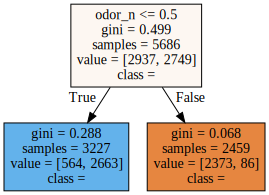

In [64]:
export_graphviz(tree_model2, out_file = 'tree2.dot',
               class_names=['식용','독'],
               feature_names=X_train.columns,
               impurity=True,
               filled = True)

with open('tree2.dot', encoding='UTF8') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

### 특성선택
- tree 모델의 특성중요도

In [66]:
fi = tree_model.feature_importances_
fi

array([7.11552514e-06, 7.03359667e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.80750565e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.02014855e-02, 0.00000000e+00,
       0.00000000e+00, 2.44753222e-02, 0.00000000e+00, 6.13774762e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.96838949e-04, 1.81626306e-01, 0.00000000e+00, 0.00000000e+00,
      

In [67]:
df = pd.DataFrame(fi, index=X_train.columns)
df.sort_values(by=0, ascending = False)

,0
odor_n,0.613775
stalk-root_c,0.181626
stalk-surface-below-ring_y,0.117135
spore-print-color_r,0.034157
odor_l,0.024475
...,...
gill-color_b,0.000000
gill-size_n,0.000000
gill-size_b,0.000000
gill-spacing_w,0.000000


### 정규화(Normalization)

In [68]:
data = pd.read_csv('data_skew.csv')
data.head()

,0,1,2,y
0,56,18,27,2.926144
1,81,57,3,4.744364
2,25,9,11,1.439488
3,20,13,30,0.569621
4,27,13,13,1.230924


In [70]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [71]:
X.shape, y.shape

((1000, 3), (1000,))

Text(0.5, 0, 'value')

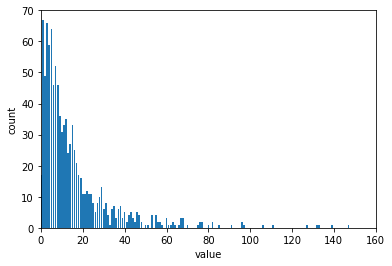

In [72]:
plt.xlim(0,160)
plt.ylim(0,70)

bins = np.bincount(X.iloc[:,1])
plt.bar(range(len(bins)), bins)
plt.ylabel('count')
plt.xlabel('value')

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [75]:
from sklearn.neighbors import KNeighborsRegressor
#모델선택
knn = KNeighborsRegressor(n_neighbors = 3)
#모델학습
knn.fit(X_train,y_train)
#모델평가
knn.score(X_train,y_train)

0.8850473651140385

In [76]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'value')

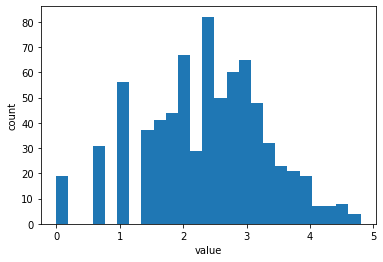

In [77]:
plt.hist(X_train_log.iloc[:,0], bins = 25)
plt.ylabel('count')
plt.xlabel('value')

In [78]:
knn.fit(X_train_log, y_train)
knn.score(X_train_log, y_train)

# 만약 데이터가 오른쪽으로 분포가 쏠려있다면? -> 지수함수를 써서 변환

# 0.8850473651140385  -> 0.9132914933308882 성능 개선

0.9132914933308882